# Basic Examples of Batch

In [2]:
import graphlearning.active_learning as al
import graphlearning as gl
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import os
"""
path = os.getcwd()
path, cwd = os.path.split(path)
while cwd != 'SAR':
    os.chdir('../')
    path, cwd = os.path.split(path)
    if len(path) == 1 and len(cwd) == 0:
        assert False, "This notebook is not saved in the correct directory. "
        break

"""
print("Current Directory: ", os.getcwd())
import utils
import batch_active_learning as bal

Current Directory:  /Users/jameschapman/Documents/GitHub/SAR_BAL


## Dataset generation

In [3]:
num_points = 2000
X = np.random.uniform(size = (num_points, 2))
labels = np.zeros(num_points, dtype=int)
labels[X[:, 1] - 3*(X[:, 0]-.5)**2 < .2] = 1
W = gl.weightmatrix.knn(X, 20, kernel = 'distance')
G = gl.graph(W)
train_ind = []

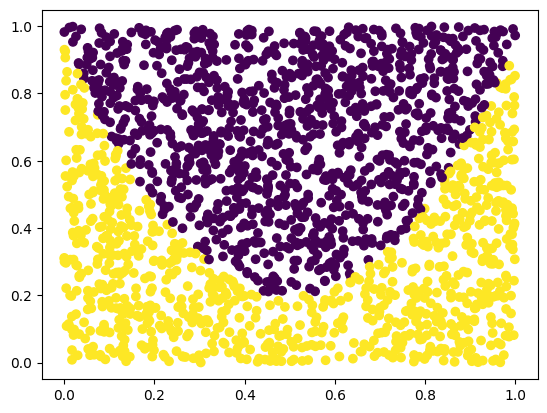

In [4]:
fig0 = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.show()

## Active learning stuff

In [5]:
coreset = bal.coreset_dijkstras(G, .5, data = X, density_info = (True, .2, 1.0), initial=list(train_ind));
print("Coreset = ", coreset)

Coreset =  [1534, 888, 1740, 1515, 1145, 178, 256, 827, 561, 934, 980, 582, 1460, 1036, 711, 1557, 650, 808, 1577, 375, 55]


In [6]:
#AL Objects
model = gl.ssl.laplace(W, None, reweighting='poisson')
acq = al.model_change_vopt()
act = al.active_learning(W, coreset, labels[coreset], eval_cutoff=min(200, len(X) // 2))
u = model.fit(act.current_labeled_set, act.current_labels)  # perform classification with GSSL classifier

act.candidate_inds = np.setdiff1d(act.training_set, act.current_labeled_set)
acq_vals = acq.compute_values(act, u)

modded_acq_vals = np.zeros(len(X))
modded_acq_vals[act.candidate_inds] = acq_vals

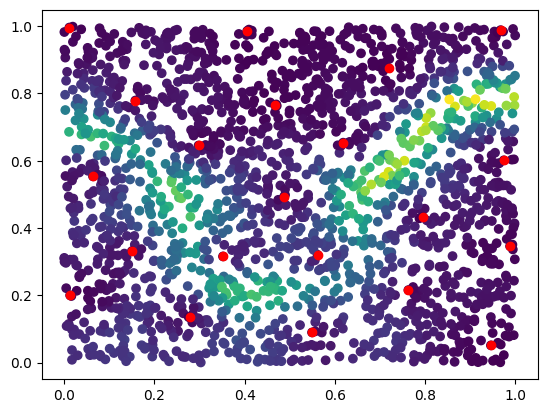

In [7]:
fig1 = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=modded_acq_vals)
plt.scatter(X[coreset, 0], X[coreset, 1], c='r')
plt.show()

In [8]:
LM_batch, _, _ = bal.coreset_run_experiment(X, labels, W, coreset, num_iter=1, method='Laplace',
                           display=False, use_prior=False, al_mtd='local_max', debug=False,
                           acq_fun='mcvopt', batchsize=5)
LM_batch = np.setdiff1d(LM_batch, coreset)
batch_size = len(LM_batch)

In [9]:
highest = np.argsort(modded_acq_vals)[-batch_size:]

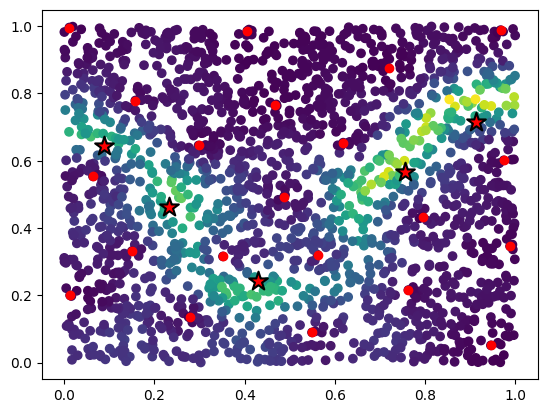

In [10]:
fig2 = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=modded_acq_vals)
plt.scatter(X[coreset, 0], X[coreset, 1], c='r')
plt.scatter(X[LM_batch, 0], X[LM_batch, 1], c='r', marker='*', s=200, edgecolors='k', linewidths=1.5)
plt.show()

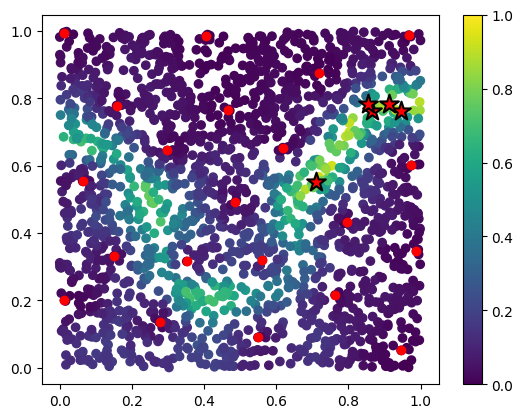

In [11]:
fig3 = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=modded_acq_vals)
plt.scatter(X[coreset, 0], X[coreset, 1], c='r')
plt.scatter(X[highest, 0], X[highest, 1], c='r', marker='*', s=200, edgecolors='k', linewidths=1.5)
tmp = plt.colorbar()
plt.show()

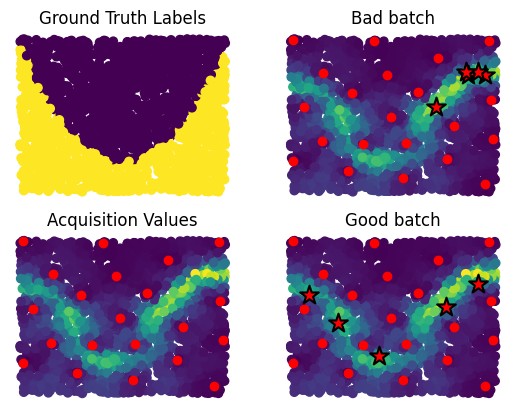

In [14]:
#fig_all, axes = plt.subplots(nrows=2, ncols=2)
fig_all = plt.figure()
plt.subplot(221) 
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Ground Truth Labels")
plt.axis('off')
#plt.show()

plt.subplot(222)
plt.scatter(X[:, 0], X[:, 1], c=modded_acq_vals)
plt.scatter(X[coreset, 0], X[coreset, 1], c='r')
plt.scatter(X[highest, 0], X[highest, 1], c='r', marker='*', s=200, edgecolors='k', linewidths=1.5)
plt.title("Bad batch")
plt.axis('off')
#plt.show()

plt.subplot(223)
plt.scatter(X[:, 0], X[:, 1], c=modded_acq_vals)
plt.scatter(X[coreset, 0], X[coreset, 1], c='r')
plt.title("Acquisition Values")
plt.axis('off')
#plt.show()


plt.subplot(224)
plt.scatter(X[:, 0], X[:, 1], c=modded_acq_vals)
plt.scatter(X[coreset, 0], X[coreset, 1], c='r')
plt.scatter(X[LM_batch, 0], X[LM_batch, 1], c='r', marker='*', s=200, edgecolors='k', linewidths=1.5)
plt.title("Good batch")
plt.axis('off')
#plt.show()

#cbar = fig_all.colorbar(im, ax=axes.ravel().tolist(), shrink=0.95)

#fig_all.colorbar(tmp)
plt.savefig("SAR Results/SimpleBatchExamples.jpg")
plt.show()
